In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


In [2]:
raw = pd.read_excel('V2 Gies Sales Account 360 Data Set.xlsx')
print(raw.head())

   Period     Load  Company ID Customer #/Ship To                    Company  \
0       1  9643113    13831201          138312-01  GROCERY SUPPLY/SULPHUR SP   
1       1  9642714    12654200          126542-00               M R WILLIAMS   
2       1  9642777    12654200          126542-00               M R WILLIAMS   
3       1  9642693    23820501          238205-01                     K-VA-T   
4       1  9642532      346000          003460-00      PERF FS/BOWLING GREEN   

  State        Tier   Weight   Cases  Lines  Pallets  Cases/Line  PO Count  \
0    TX      Tier I  28709.0  3810.0  270.0     15.0   14.111111      61.0   
1    NC      Tier I   9542.0  1492.0  105.0      6.0   14.209524      13.0   
2    NC      Tier I  30658.0  5007.0  255.0     20.0   19.635294       1.0   
3    VA      Tier I  24511.0  2673.0   77.0     25.0   34.714286       1.0   
4    KY  Corporates  30827.0  1510.0  128.0     11.0   11.796875       8.0   

   Item Spread  Dock Time (Hours)  
0          NaN

In [3]:
print(raw.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96805 entries, 0 to 96804
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Period              96805 non-null  int64  
 1   Load                96805 non-null  int64  
 2   Company ID          96805 non-null  int64  
 3   Customer #/Ship To  96805 non-null  object 
 4   Company             96805 non-null  object 
 5   State               96805 non-null  object 
 6   Tier                96805 non-null  object 
 7   Weight              96799 non-null  float64
 8   Cases               96799 non-null  float64
 9   Lines               96799 non-null  float64
 10  Pallets             96799 non-null  float64
 11  Cases/Line          96799 non-null  float64
 12  PO Count            92792 non-null  float64
 13  Item Spread         95970 non-null  float64
 14  Dock Time (Hours)   96805 non-null  float64
dtypes: float64(8), int64(3), object(4)
memory usage: 11.1

In [4]:
print(raw.describe())

             Period          Load    Company ID         Weight         Cases  \
count  96805.000000  9.680500e+04  9.680500e+04   96799.000000  96799.000000   
mean       6.878012  4.933618e+06  1.422729e+07   16728.958543   1419.309001   
std        3.688658  4.230908e+06  8.260835e+06   11931.279313   1125.961358   
min        1.000000  1.001137e+06  4.400000e+03      -3.000000    -29.000000   
25%        4.000000  1.232107e+06  1.246711e+07    6107.000000    449.000000   
50%        7.000000  1.481027e+06  1.411560e+07   13614.000000   1143.000000   
75%       10.000000  9.782430e+06  2.221620e+07   26565.000000   2180.000000   
max       13.000000  9.999797e+06  2.434420e+07  145469.000000  10900.000000   

              Lines       Pallets    Cases/Line      PO Count   Item Spread  \
count  96799.000000  96799.000000  96799.000000  92792.000000  95970.000000   
mean      93.943037      9.520491     39.767561      5.061180      0.065418   
std       99.326285      8.705397    114.0

In [5]:
raw = raw.dropna(subset=['PO Count'])
columns_to_check = ['Weight', 'Cases', 'Lines', 'Pallets', 'Cases/Line']
raw = raw[(raw[columns_to_check] >= 0).all(axis=1)]
clean = raw[raw['Item Spread'] <= 1]
print(clean.describe())

             Period          Load    Company ID         Weight         Cases  \
count  91999.000000  9.199900e+04  9.199900e+04   91999.000000  91999.000000   
mean       6.893771  4.928756e+06  1.381694e+07   16879.009663   1440.215491   
std        3.664379  4.231908e+06  8.188235e+06   11933.269184   1133.492387   
min        1.000000  1.001137e+06  4.400000e+03       0.000000      0.000000   
25%        4.000000  1.231724e+06  1.201100e+07    6223.000000    460.000000   
50%        7.000000  1.480653e+06  1.398270e+07   13827.000000   1173.000000   
75%       10.000000  9.783726e+06  2.139771e+07   26767.000000   2200.000000   
max       13.000000  9.999797e+06  2.434240e+07  145469.000000  10900.000000   

              Lines       Pallets    Cases/Line      PO Count   Item Spread  \
count  91999.000000  91999.000000  91999.000000  91999.000000  91999.000000   
mean      96.747030      9.397820     38.130992      5.061131      0.062718   
std      100.432238      8.512206    111.5

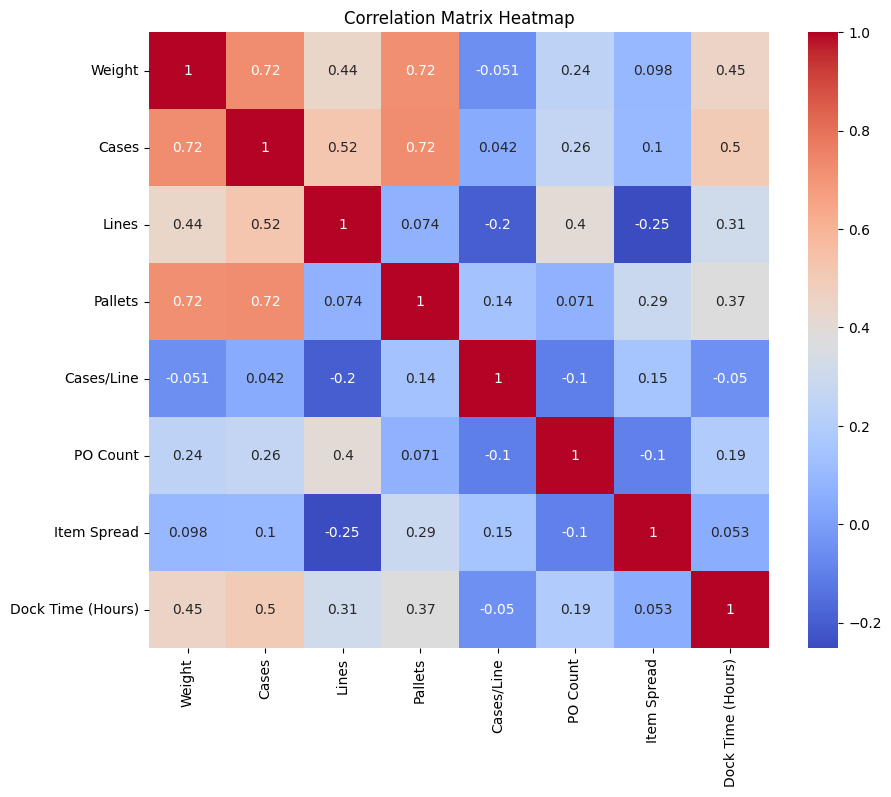

In [6]:
cols_extract = ['Weight', 'Cases', 'Lines', 'Pallets', 'Cases/Line', 'PO Count', 'Item Spread', 'Dock Time (Hours)']
corr_matrix = clean[cols_extract].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

In [18]:
# convert into log scale
clean['Log Cases/Line'] = np.log1p(clean['Cases/Line'])
clean['Log PO Count'] = np.log1p(clean['PO Count'])
clean['Log Time'] = np.log1p(clean['Dock Time (Hours)'])
print(clean.head())

     Period     Load  Company ID Customer #/Ship To                  Company  \
146       1  9643456    14603400          146034-00       DOUGLAS CO./CONWAY   
241       1  9643316     1328301          013283-01         PERF FS/VALDOSTA   
254       1  9643580      372500          003725-00             BRIGGS, INC.   
259       1  9645702    24231100          242311-00  SFS DIST - SKOUFIS FOOD   
260       1  9645705    14751400          147514-00           CRISTINA FOODS   

    State        Tier   Weight   Cases  Lines  Pallets  Cases/Line  PO Count  \
146    AR     Tier II  16693.0  3312.0  182.0     20.0   18.197802      38.0   
241    GA  Corporates  36773.0  2804.0  173.0     15.0   16.208092       8.0   
254    MS     Tier II  15979.0  1296.0  122.0      9.0   10.622951       5.0   
259    IL    Tier III   7938.0   466.0   25.0      4.0   18.640000       5.0   
260    IL    Tier III   5849.0   335.0   11.0      2.0   30.454545       1.0   

     Item Spread  Dock Time (Hours)  L

C:\Users\81623\AppData\Local\Temp\ipykernel_2948\937517823.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean['Log Cases/Line'] = np.log1p(clean['Cases/Line'])
C:\Users\81623\AppData\Local\Temp\ipykernel_2948\937517823.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean['Log PO Count'] = np.log1p(clean['PO Count'])
C:\Users\81623\AppData\Local\Temp\ipykernel_2948\937517823.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexe

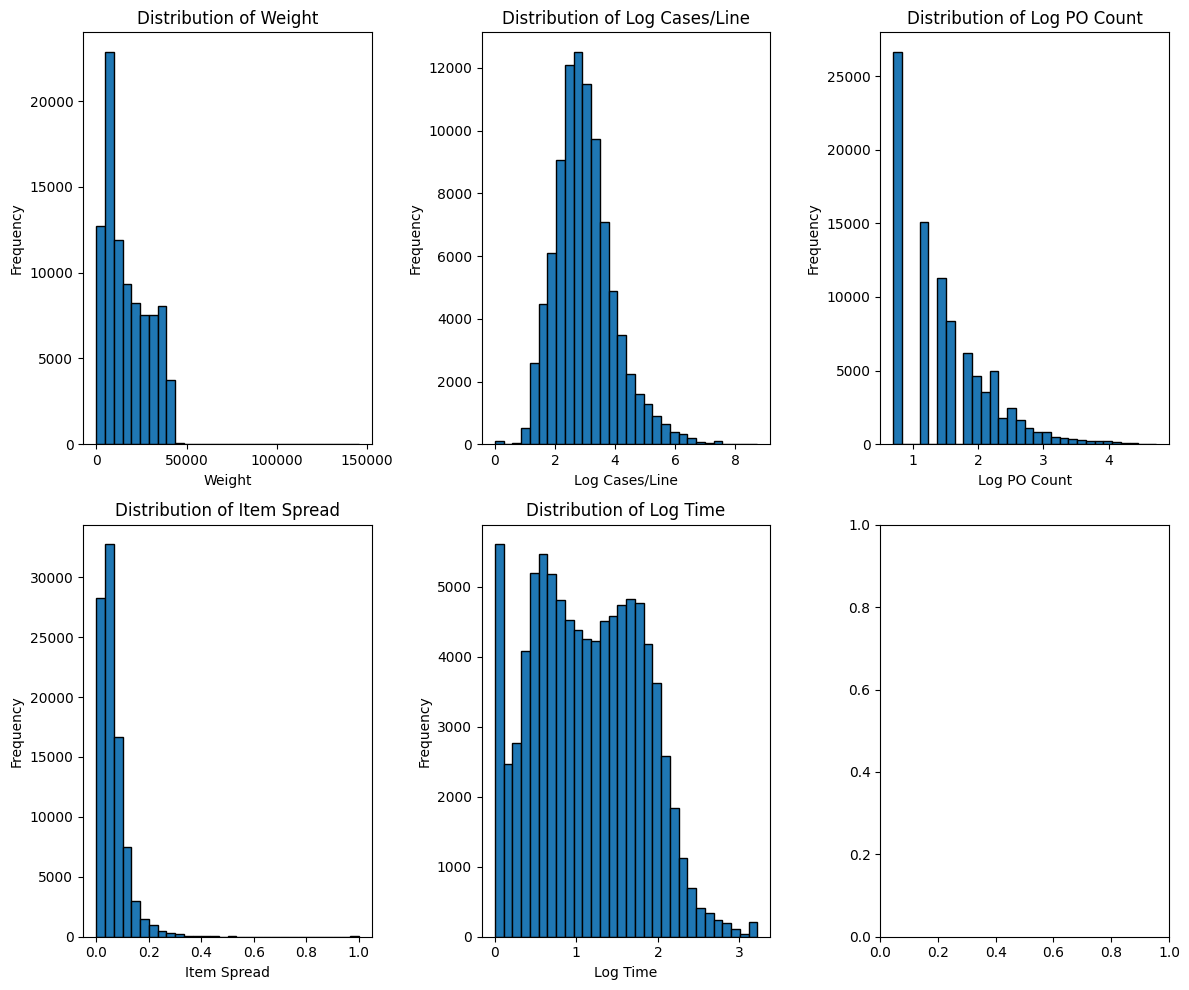

In [8]:
fig, axes = plt.subplots(2, 3, figsize=(12, 10))
features = ['Weight', 'Log Cases/Line', 'Log PO Count', 'Item Spread', 'Log Time']

for ax, feat in zip(axes.flatten(), features):
    ax.hist(clean[feat], bins=30, edgecolor='black')
    ax.set_title(f'Distribution of {feat}')
    ax.set_xlabel(feat)
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

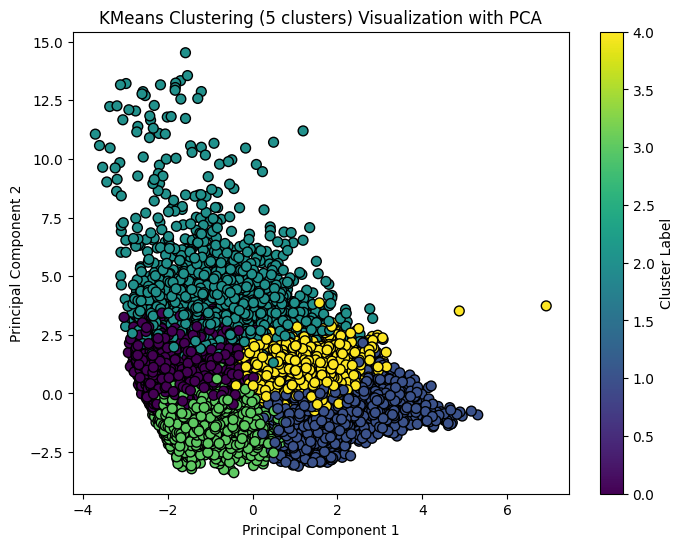

In [9]:
# Define "scaler" and "X_features" if they haven't been defined yet
scaler = StandardScaler()
X_features = clean[features]

# 1. Standardize the features
scaler_new = scaler.__class__()  # reinitialize a new scaler using the same StandardScaler class
X_scaled_new = scaler_new.fit_transform(X_features)

# 2. KMeans clustering with 5 clusters
kmeans_5 = KMeans(n_clusters=5, random_state=42)
labels_5 = kmeans_5.fit_predict(X_scaled_new)

# 3. PCA to reduce to 2 dimensions for visualization
pca_2d_new = PCA(n_components=2)
X_pca_2d = pca_2d_new.fit_transform(X_scaled_new)

# 4. Plot the PCA results, colored by cluster labels
plt.figure(figsize=(8, 6))
plt.scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], c=labels_5, cmap='viridis', edgecolor='k', s=50)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('KMeans Clustering (5 clusters) Visualization with PCA')
plt.colorbar(label='Cluster Label')
plt.show()

In [10]:
# Assign the kMeans cluster labels from labels_5 to the 'clean' DataFrame
clean['Cluster'] = labels_5

# Print the first few rows to inspect the new "Cluster" column
print(clean.head())

# Count the number of samples in each cluster
print(clean['Cluster'].value_counts())

     Period     Load  Company ID Customer #/Ship To                  Company  \
146       1  9643456    14603400          146034-00       DOUGLAS CO./CONWAY   
241       1  9643316     1328301          013283-01         PERF FS/VALDOSTA   
254       1  9643580      372500          003725-00             BRIGGS, INC.   
259       1  9645702    24231100          242311-00  SFS DIST - SKOUFIS FOOD   
260       1  9645705    14751400          147514-00           CRISTINA FOODS   

    State        Tier   Weight   Cases  Lines  Pallets  Cases/Line  PO Count  \
146    AR     Tier II  16693.0  3312.0  182.0     20.0   18.197802      38.0   
241    GA  Corporates  36773.0  2804.0  173.0     15.0   16.208092       8.0   
254    MS     Tier II  15979.0  1296.0  122.0      9.0   10.622951       5.0   
259    IL    Tier III   7938.0   466.0   25.0      4.0   18.640000       5.0   
260    IL    Tier III   5849.0   335.0   11.0      2.0   30.454545       1.0   

     Item Spread  Dock Time (Hours)  L

C:\Users\81623\AppData\Local\Temp\ipykernel_2948\3295270442.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean['Cluster'] = labels_5


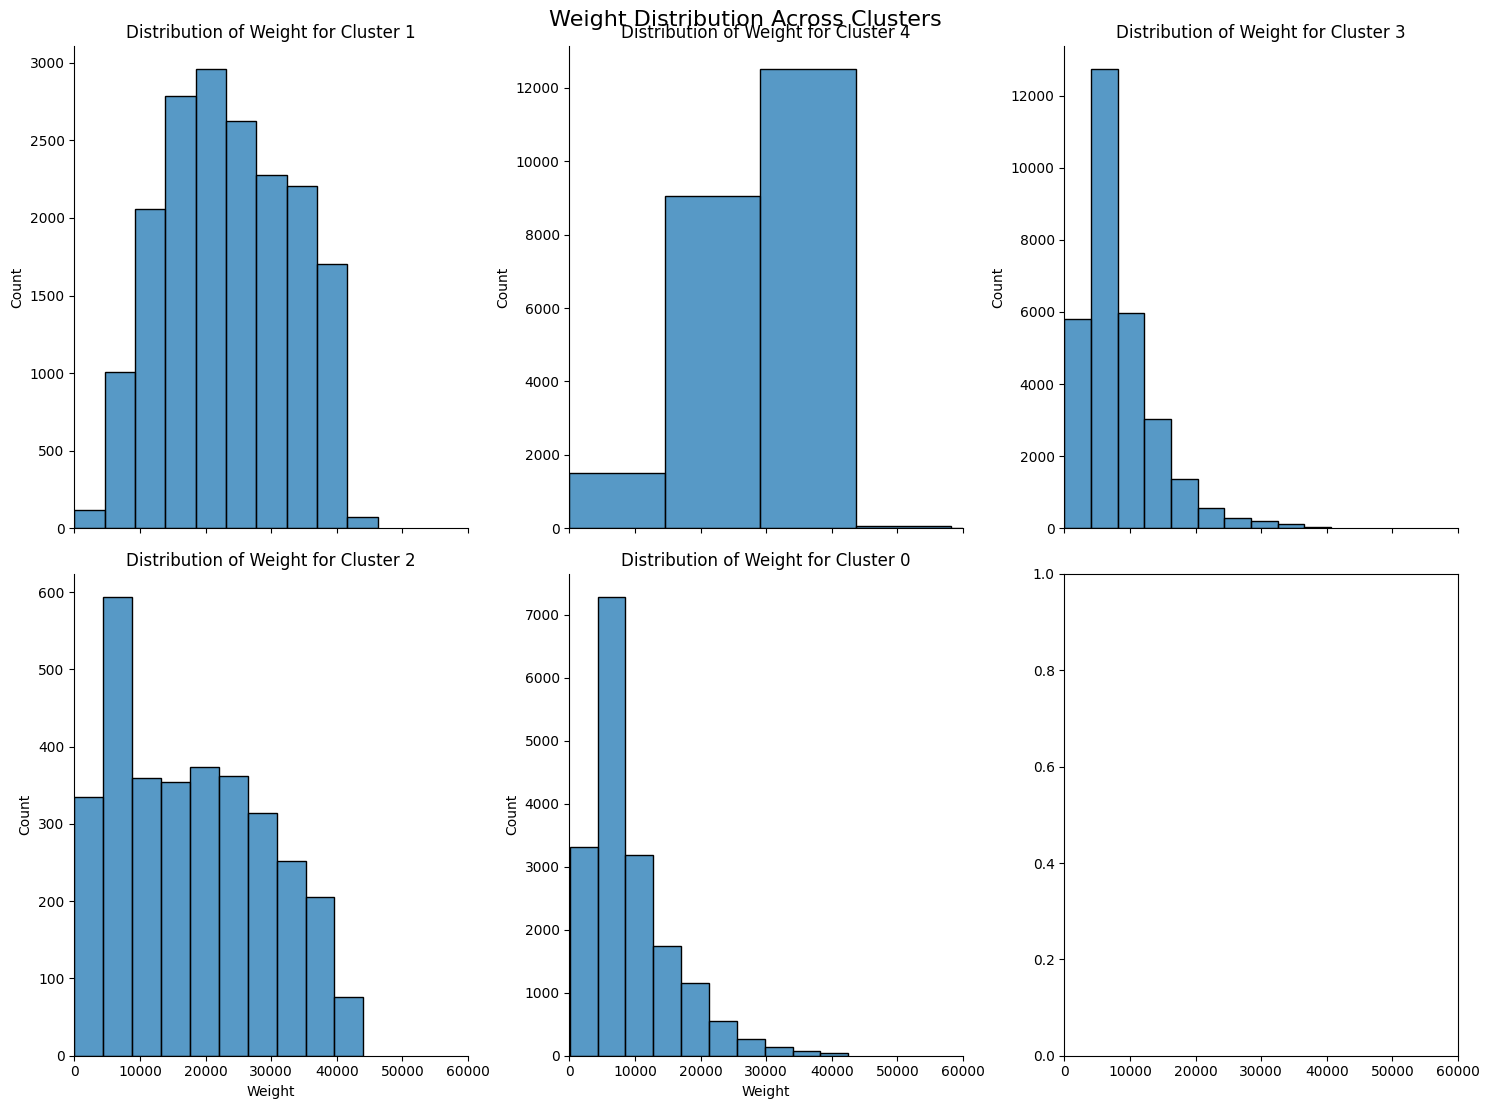

In [15]:
# 获取所有的 Cluster 标签
clusters = clean['Cluster'].unique()

# 定义 subset 为 clean 数据集
subset = clean

# 创建子图
fig, axes = plt.subplots(2, 3, figsize=(15, 12), sharex=True)

# 遍历每个 Cluster 并绘制直方图
for ax, cluster in zip(axes.flatten(), clusters):
    subset_cluster = subset[subset['Cluster'] == cluster]
    sns.histplot(data=subset_cluster, x="Weight", bins=10, ax=ax, kde=False)
    ax.set_xlim(0, 60000)  # 放宽限制
    ax.set_title(f"Distribution of Weight for Cluster {cluster}")
    ax.set_xlabel("Weight")
    ax.set_ylabel("Count")
    # 补充X轴坐标: 自定义X轴刻度
    ax.set_xticks(np.arange(0, 60001, 10000))
    ax.spines['top'].set_visible(False)  # 隐藏顶部边框
    ax.spines['right'].set_visible(False)  # 隐藏右侧边框

# 添加整体标题
fig.suptitle("Weight Distribution Across Clusters", fontsize=16, y=0.92)

# 调整布局
plt.tight_layout(rect=[0, 0, 1, 0.95])  # 在框内调整布局
plt.show()

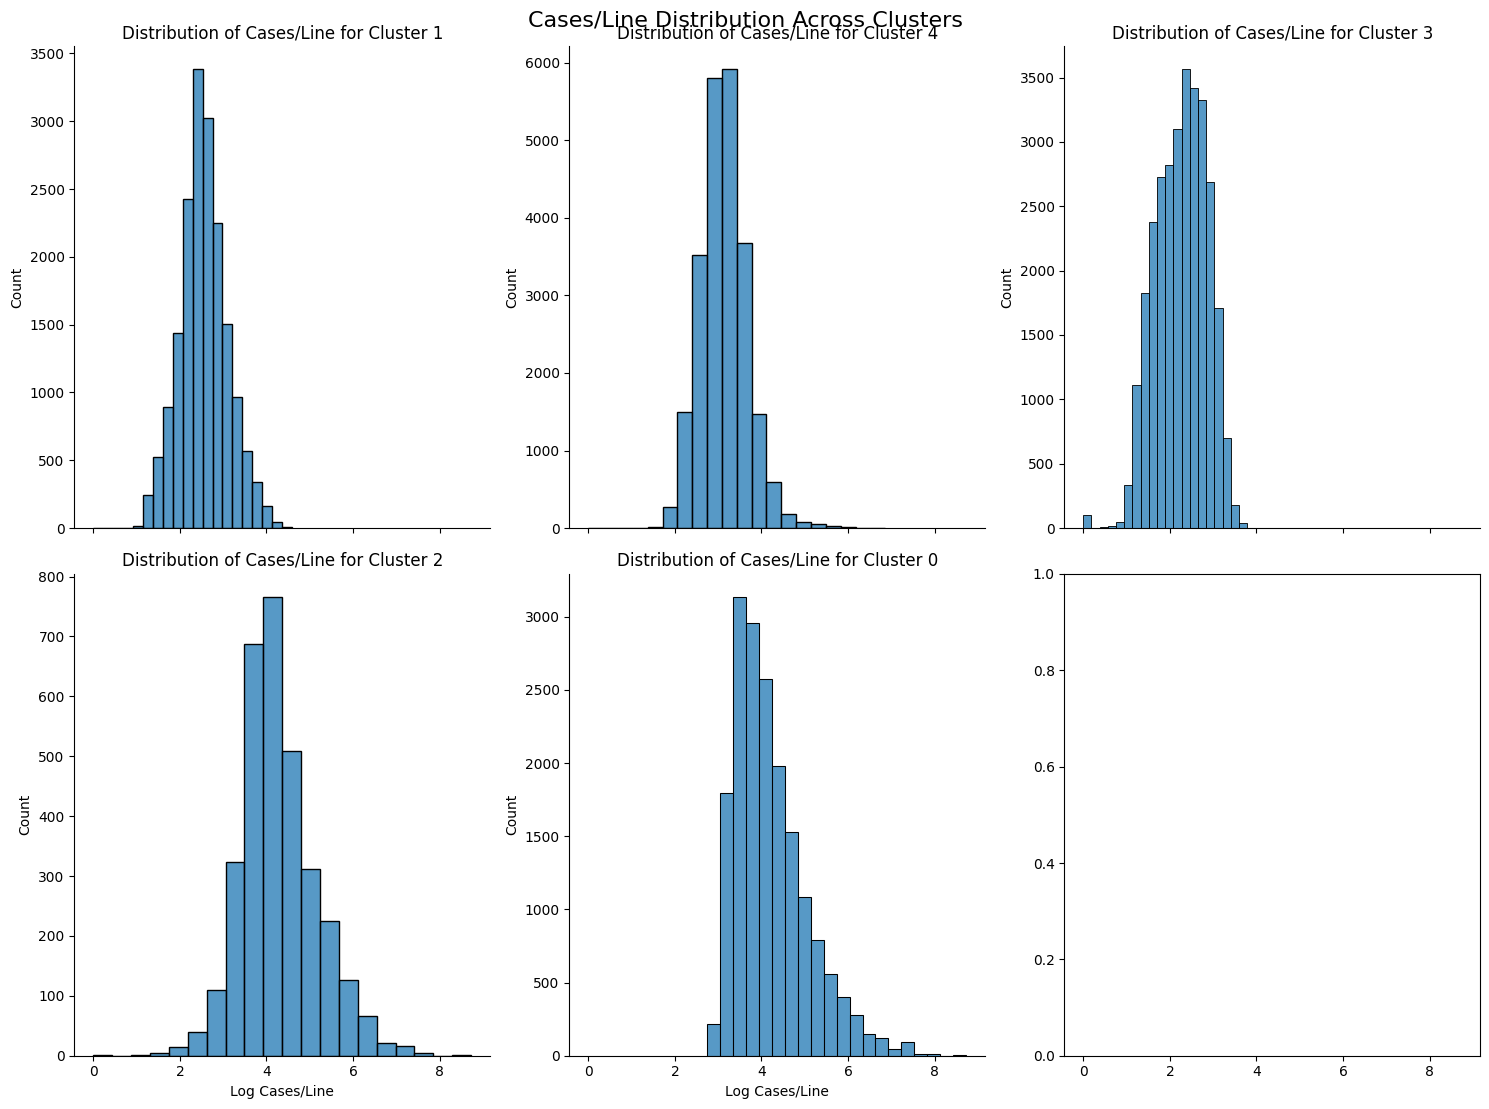

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(15, 12), sharex=True)

for ax, cluster in zip(axes.flatten(), clusters):
    subset_cluster = subset[subset['Cluster'] == cluster]
    sns.histplot(data=subset_cluster, x="Log Cases/Line", bins=20, ax=ax, kde=False)
    ax.set_title(f"Distribution of Cases/Line for Cluster {cluster}")
    ax.set_xlabel("Log Cases/Line")
    ax.set_ylabel("Count")
    ax.spines['top'].set_visible(False)  
    ax.spines['right'].set_visible(False)  


fig.suptitle("Cases/Line Distribution Across Clusters", fontsize=16, y=0.92)


plt.tight_layout(rect=[0, 0, 1, 0.95])  
plt.show()

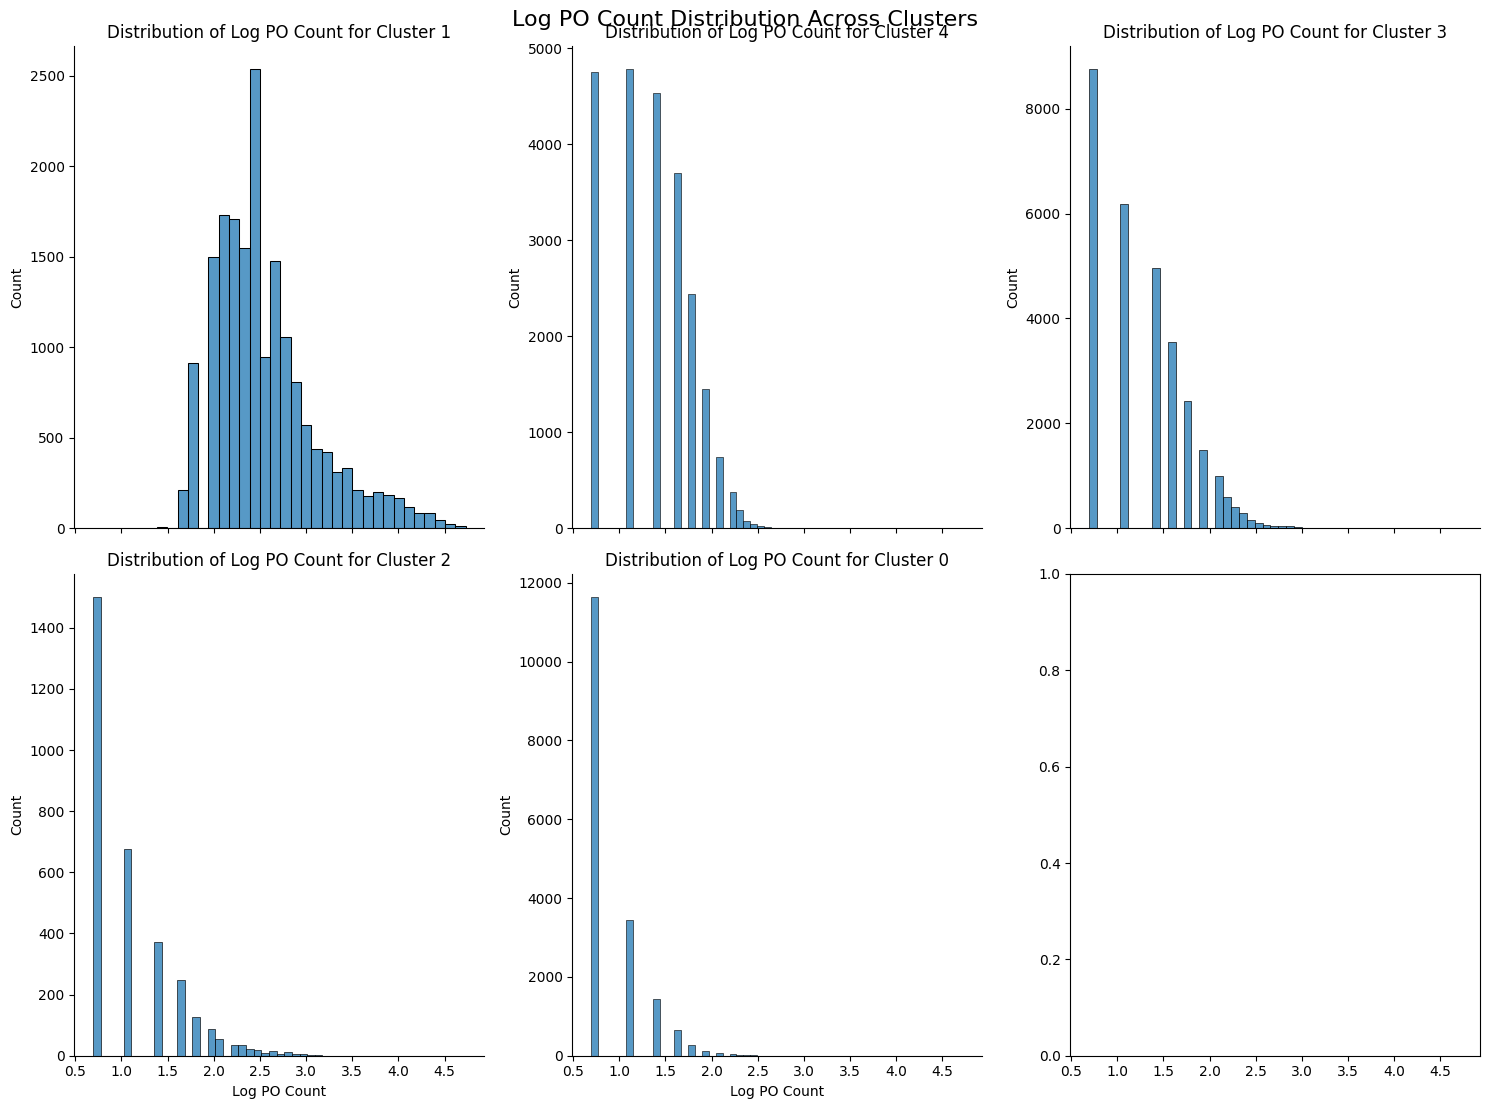

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(15, 12), sharex=True)

for ax, cluster in zip(axes.flatten(), clusters):
    subset_cluster = subset[subset['Cluster'] == cluster]
    sns.histplot(data=subset_cluster, x="Log PO Count", bins=30, ax=ax, kde=False)
    ax.set_title(f"Distribution of Log PO Count for Cluster {cluster}")
    ax.set_xlabel("Log PO Count")
    ax.set_ylabel("Count")
    ax.spines['top'].set_visible(False) 
    ax.spines['right'].set_visible(False)  

fig.suptitle("Log PO Count Distribution Across Clusters", fontsize=16, y=0.92)


plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

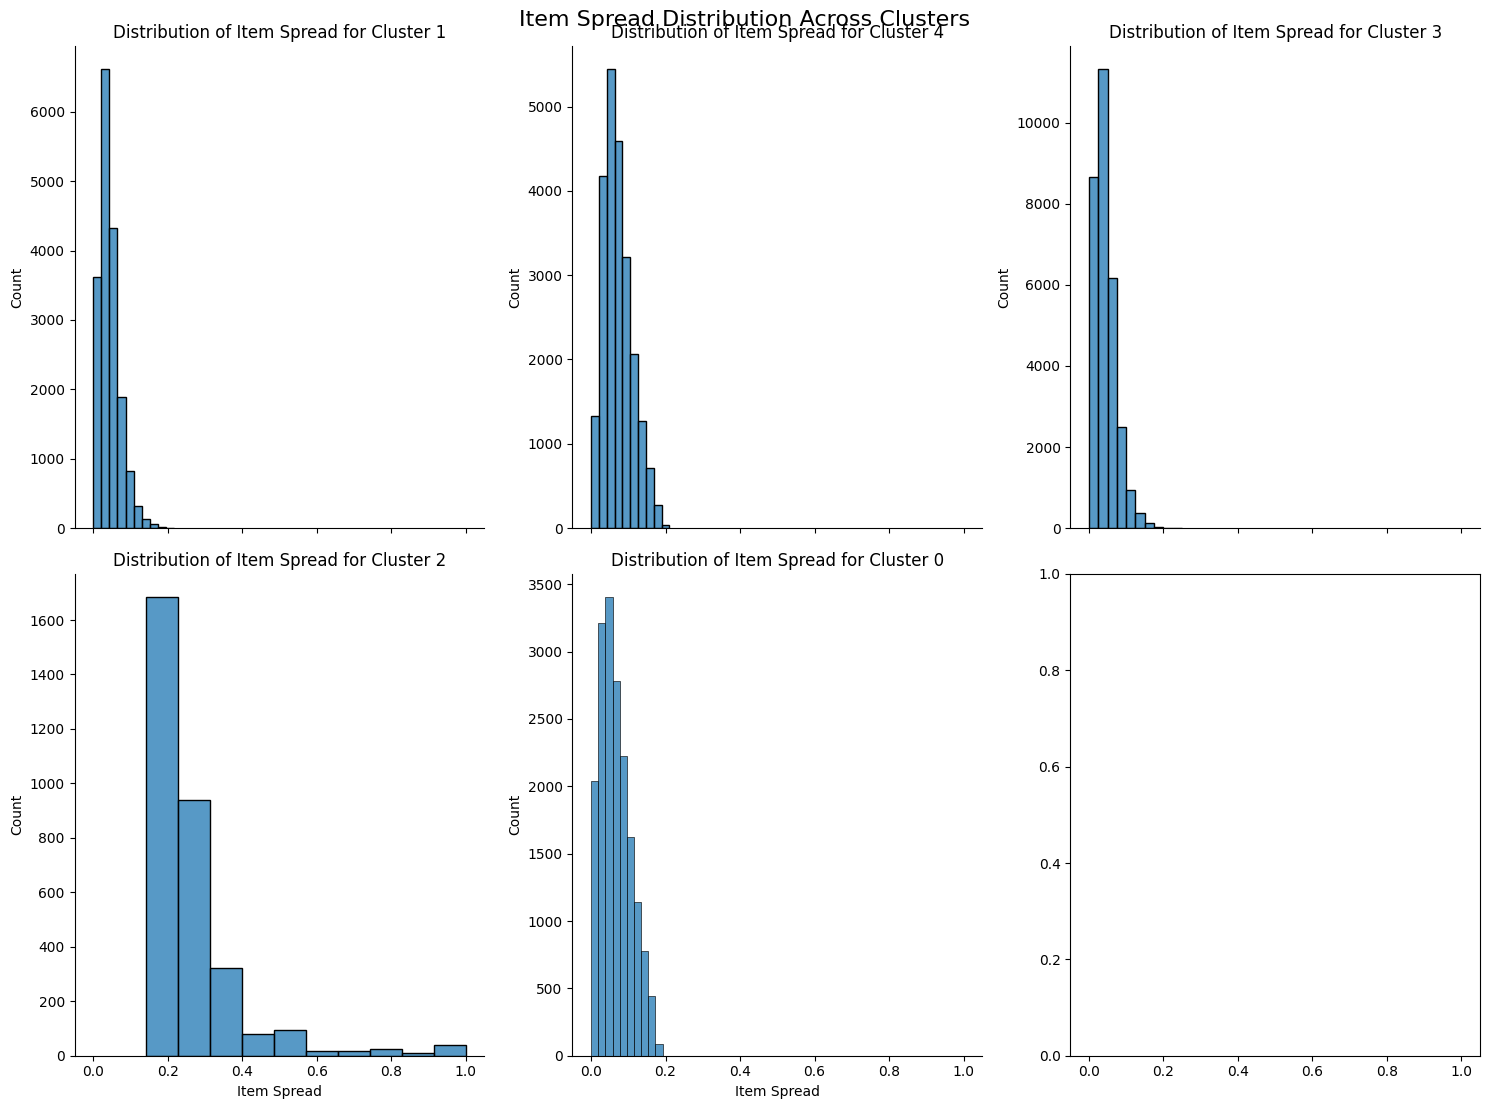

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(15, 12), sharex=True)


for ax, cluster in zip(axes.flatten(), clusters):
    subset_cluster = subset[subset['Cluster'] == cluster]
    sns.histplot(data=subset_cluster, x="Item Spread", bins=10, ax=ax, kde=False)
    ax.set_title(f"Distribution of Item Spread for Cluster {cluster}")
    ax.set_xlabel("Item Spread")
    ax.set_ylabel("Count")
    ax.spines['top'].set_visible(False) 
    ax.spines['right'].set_visible(False) 


fig.suptitle("Item Spread Distribution Across Clusters", fontsize=16, y=0.92)
plt.tight_layout(rect=[0, 0, 1, 0.95])  
plt.show()

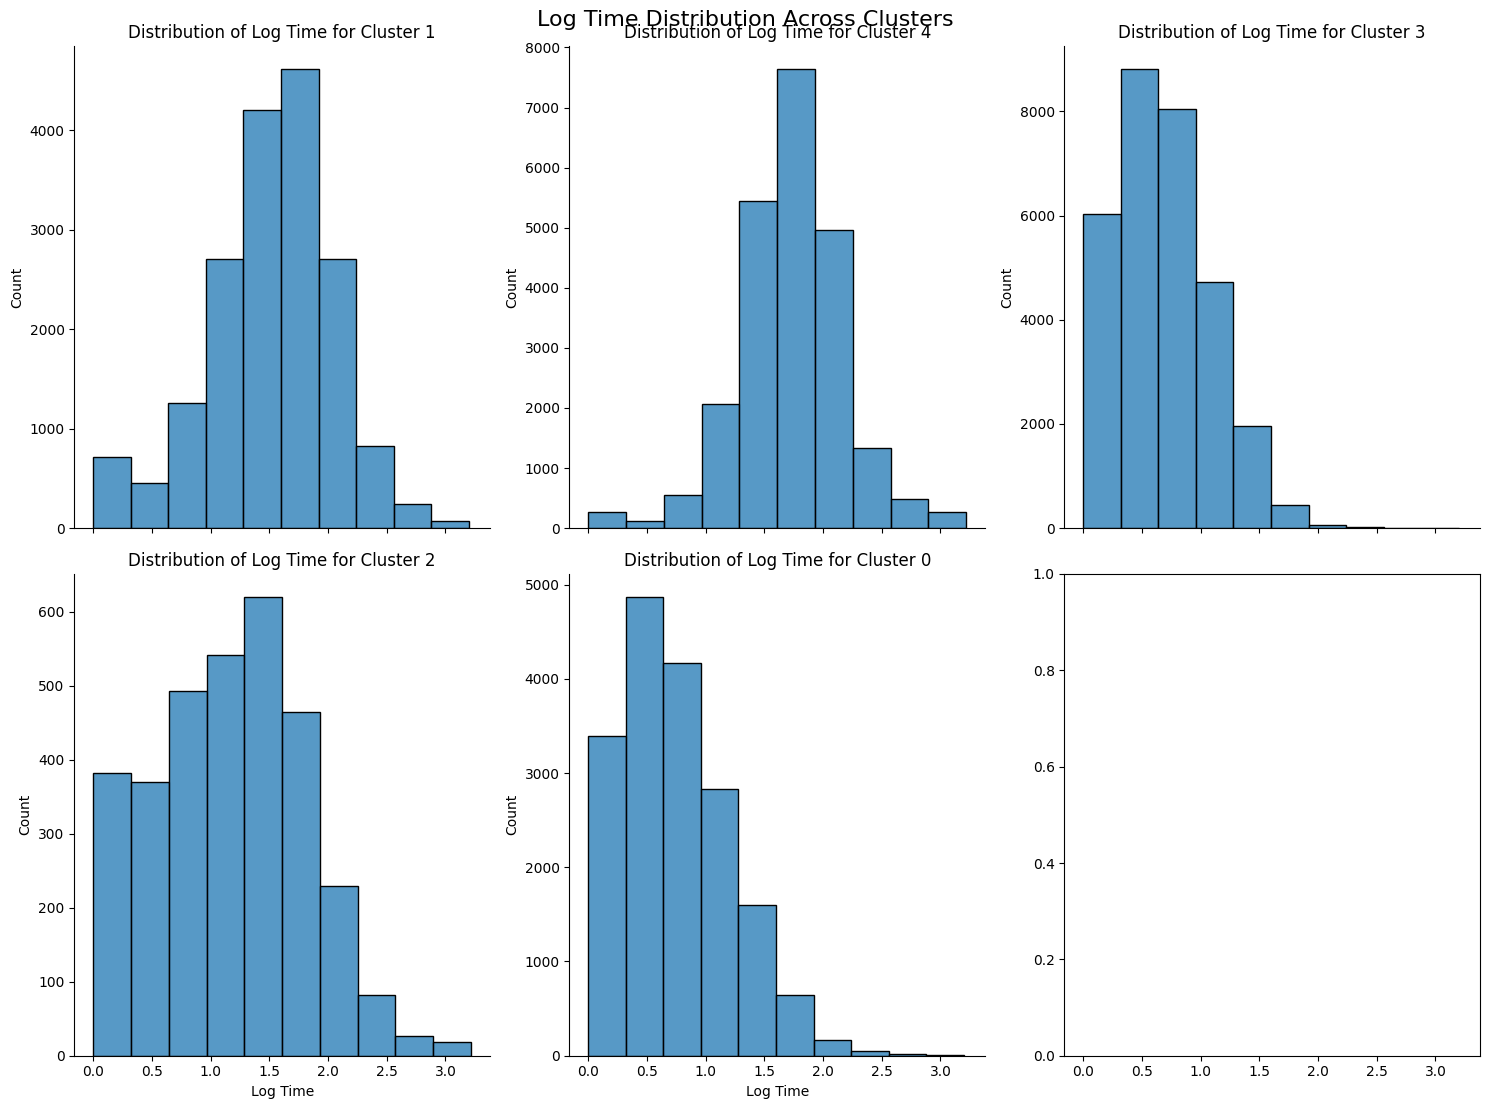

In [ ]:
fig, axes_new = plt.subplots(2, 3, figsize=(15, 12), sharex=True)


for ax, cluster in zip(axes_new.flatten(), clusters):
    subset_cluster = subset[subset['Cluster'] == cluster]
    sns.histplot(data=subset_cluster, x="Log Time", bins=10, ax=ax, kde=False)
    ax.set_title(f"Distribution of Log Time for Cluster {cluster}")
    ax.set_xlabel("Log Time")
    ax.set_ylabel("Count")
    ax.spines['top'].set_visible(False) 
    ax.spines['right'].set_visible(False)  

fig.suptitle("Log Time Distribution Across Clusters", fontsize=16, y=0.92)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [ ]:
grouped = clean.groupby('Cluster')[['Weight', 'Log Cases/Line', 'Log PO Count', 'Item Spread', 'Log Time']]
means = grouped.mean()
medians = grouped.median()
descriptions = grouped.describe()
print("Means:")
print(means)
print("\nMedians:")
print(medians)
print("\nDescriptions:")
print(descriptions)

Means:
               Weight  Log Cases/Line  Log PO Count  Item Spread  Log Time
Cluster                                                                   
0         9094.885838        4.212763      0.902060     0.065385  0.739499
1        23533.215565        2.550142      2.547872     0.043975  1.514694
2        18019.864890        4.278232      1.117462     0.265667  1.159340
3         8100.080020        2.260946      1.292112     0.043692  0.676666
4        28997.442734        3.132185      1.348851     0.071557  1.728463

Medians:
          Weight  Log Cases/Line  Log PO Count  Item Spread  Log Time
Cluster                                                              
0         6946.5        4.022043      0.693147     0.058824  0.677047
1        23075.0        2.521353      2.397895     0.038647  1.571044
2        17354.0        4.168074      1.098612     0.222222  1.181899
3         6635.0        2.303447      1.386294     0.037736  0.647242
4        30231.0        3.111826      

Cluster 0: "Moderate weight, high cases per line, few purchase orders, low Item Spread, and moderate dock time."

Cluster 1: "High weight, moderate cases per line, bulk orders with many purchase orders, low Item Spread, and longer dock time."

Cluster 2: "Medium-high weight, extremely high cases per line, a moderate number of purchase orders, the highest Item Spread,  and longer dock time."

Cluster 3: "Low weight, few cases per line, a moderate number of purchase orders, few Item Spread, and short dock time."

Cluster 4: "Extra-large weight, moderate cases per line, above-average purchase orders, average Item Spread, and the longest dock time."